In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [3]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [4]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [5]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [6]:
# reflect an existing database into a new model
Base = automap_base()

# reflect the tables
Base.prepare(engine, reflect=True)


In [7]:
# We can view all of the classes that automap found
Base.classes.keys()


['measurement', 'station']

In [8]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station


In [9]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Climate Analysis

In [10]:
first_row_measurement = session.query(Measurement).first()
first_row_measurement.__dict__


{'_sa_instance_state': <sqlalchemy.orm.state.InstanceState at 0x1178a8e10>,
 'prcp': 0.08,
 'date': '2010-01-01',
 'id': 1,
 'tobs': 65.0,
 'station': 'USC00519397'}

In [11]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results
# Calculate the date 1 year ago from the last data point in the database
# Perform a query to retrieve the data and precipitation scores

precipitation = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date > "2016-08-23").all()
precipitation


[('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06', 0.0),
 ('2016-10-07'

In [12]:
# Save the query results as a Pandas DataFrame and set the index to the date column
precipitation_df = pd.DataFrame(precipitation, columns=['Date', 'Precipitation (in)'])
# precipitation_df.set_index('Date', inplace=True, )
precipitation_df

# Sort the dataframe by date
precipitation_df = precipitation_df.sort_values("Date")
precipitation_df

# #group by data- only have 1 per date, so find the average
precipitation_df = precipitation_df.groupby("Date").mean()
precipitation_df


,Precipitation (in)
Date,
2016-08-24,1.555000
2016-08-25,0.077143
2016-08-26,0.016667
2016-08-27,0.064000
2016-08-28,0.516667
...,...
2017-08-19,0.030000
2017-08-20,0.005000
2017-08-21,0.193333


In [17]:
xtick_labels = list(precipitation_df.index)
xtick_labels[0::41]

['2016-08-24',
 '2016-10-04',
 '2016-11-14',
 '2016-12-25',
 '2017-02-04',
 '2017-03-17',
 '2017-04-27',
 '2017-06-07',
 '2017-07-18']

In [18]:
import numpy as np
# locs, labels = xticks()
xticks(np.arange(9), xtick_labels, rotation=90)


NameError: name 'xticks' is not defined

([<matplotlib.axis.XTick at 0x119f72b70>,
 <a list of 9 Text xticklabel objects>)

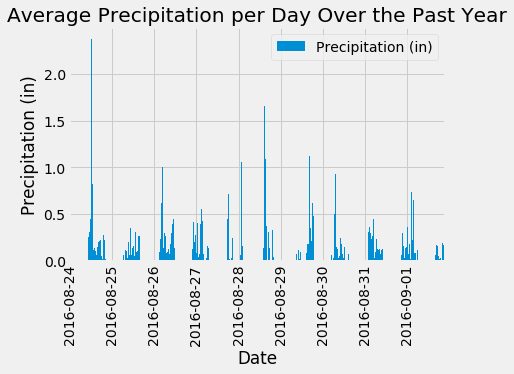

In [24]:
# Use Pandas Plotting with Matplotlib to plot the data
precipitation_plot = precipitation_df.plot(y="Precipitation (in)", kind="bar", grid=True, rot=90, title="Average Precipitation per Day Over the Past Year")
precipitation_plot.set_ylabel("Precipitation (in)")
# plt.xticks(xtick_labels)
plt.xticks(range(0,len(precipitation_df.index), 41))


In [25]:
# Use Pandas to calcualte the summary statistics for the precipitation data
precipitation_df.describe()


,Precipitation (in)
count,365.000000
mean,0.169987
std,0.295722
min,0.000000
25%,0.008571
50%,0.070000
75%,0.191667
max,2.380000


In [19]:
# Design a query to show how many stations are available in this dataset.
station_count = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).all()

print("There are " + str(len(station_count)) + " stations in this dataset.")


There are 9 stations in this dataset.


In [20]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.
active_stations = session.query(Measurement.station, func.count(Measurement.station)).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).all()
active_stations


[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [11]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station.
most_active_station = session.query(Measurement.station).\
    group_by(Measurement.station).\
    order_by(func.count(Measurement.station).desc()).first()
most_active_station


('USC00519281')

In [18]:
most_active_station_data = session.query(Measurement.station, func.min(Measurement.tobs), func.max(Measurement.tobs), func.avg(Measurement.tobs)).\
    filter(Measurement.station == most_active_station[0]).all()

print("The lowest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][1]) + " degrees.")
print("The highest temperature recorded at station " + most_active_station_data[0][0] + " is " + str(most_active_station_data[0][2]) + " degrees.")
print("The average temperature at station " + most_active_station_data[0][0] + " is " + str(round(most_active_station_data[0][3], 2)) + " degrees.")


The lowest temperature recorded at station USC00519281 is 54.0 degrees.
The highest temperature recorded at station USC00519281 is 85.0 degrees.
The average temperature at station USC00519281 is 71.66 degrees.


In [12]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
tob_12month = session.query(Measurement.date, Measurement.tobs).\
    filter(Measurement.station==most_active_station[0]).\
    filter(Measurement.date > '2016-08-18').\
    order_by(Measurement.date.desc()).all()
tob_12month


[('2017-08-18', 79.0),
 ('2017-08-17', 76.0),
 ('2017-08-16', 76.0),
 ('2017-08-15', 77.0),
 ('2017-08-14', 77.0),
 ('2017-08-13', 77.0),
 ('2017-08-06', 83.0),
 ('2017-08-05', 82.0),
 ('2017-08-04', 77.0),
 ('2017-07-31', 76.0),
 ('2017-07-30', 81.0),
 ('2017-07-29', 82.0),
 ('2017-07-28', 81.0),
 ('2017-07-27', 76.0),
 ('2017-07-26', 75.0),
 ('2017-07-25', 77.0),
 ('2017-07-24', 75.0),
 ('2017-07-23', 82.0),
 ('2017-07-22', 77.0),
 ('2017-07-21', 77.0),
 ('2017-07-20', 77.0),
 ('2017-07-19', 76.0),
 ('2017-07-18', 76.0),
 ('2017-07-17', 76.0),
 ('2017-07-16', 80.0),
 ('2017-07-15', 80.0),
 ('2017-07-14', 76.0),
 ('2017-07-13', 74.0),
 ('2017-07-12', 74.0),
 ('2017-07-11', 72.0),
 ('2017-07-10', 69.0),
 ('2017-07-09', 78.0),
 ('2017-07-08', 78.0),
 ('2017-07-07', 75.0),
 ('2017-07-06', 74.0),
 ('2017-07-05', 77.0),
 ('2017-07-04', 78.0),
 ('2017-07-03', 76.0),
 ('2017-07-02', 81.0),
 ('2017-07-01', 79.0),
 ('2017-06-30', 76.0),
 ('2017-06-29', 76.0),
 ('2017-06-28', 77.0),
 ('2017-06-

In [23]:
# extract only the TOB's from the list above
tobs = [item[1] for item in tob_12month]
tobs


[79.0,
 76.0,
 76.0,
 77.0,
 77.0,
 77.0,
 83.0,
 82.0,
 77.0,
 76.0,
 81.0,
 82.0,
 81.0,
 76.0,
 75.0,
 77.0,
 75.0,
 82.0,
 77.0,
 77.0,
 77.0,
 76.0,
 76.0,
 76.0,
 80.0,
 80.0,
 76.0,
 74.0,
 74.0,
 72.0,
 69.0,
 78.0,
 78.0,
 75.0,
 74.0,
 77.0,
 78.0,
 76.0,
 81.0,
 79.0,
 76.0,
 76.0,
 77.0,
 76.0,
 73.0,
 71.0,
 77.0,
 72.0,
 72.0,
 74.0,
 72.0,
 72.0,
 75.0,
 79.0,
 73.0,
 75.0,
 74.0,
 76.0,
 74.0,
 74.0,
 74.0,
 72.0,
 75.0,
 75.0,
 75.0,
 75.0,
 77.0,
 76.0,
 76.0,
 80.0,
 75.0,
 72.0,
 74.0,
 80.0,
 74.0,
 74.0,
 74.0,
 74.0,
 71.0,
 71.0,
 74.0,
 76.0,
 68.0,
 69.0,
 74.0,
 74.0,
 74.0,
 77.0,
 76.0,
 75.0,
 70.0,
 74.0,
 67.0,
 70.0,
 75.0,
 79.0,
 70.0,
 75.0,
 70.0,
 75.0,
 65.0,
 60.0,
 72.0,
 67.0,
 70.0,
 74.0,
 72.0,
 68.0,
 76.0,
 72.0,
 69.0,
 76.0,
 67.0,
 68.0,
 67.0,
 71.0,
 78.0,
 74.0,
 69.0,
 69.0,
 70.0,
 67.0,
 78.0,
 77.0,
 74.0,
 67.0,
 71.0,
 67.0,
 70.0,
 75.0,
 74.0,
 71.0,
 73.0,
 68.0,
 74.0,
 76.0,
 77.0,
 76.0,
 71.0,
 72.0,
 73.0,
 72.0,
 69.0,

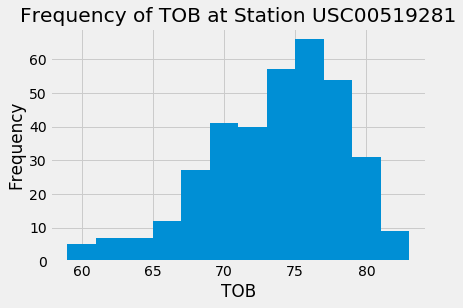

In [24]:
# create histogram to show frequencies of TOBs
plt.hist(tobs, bins=12)
plt.xlabel("TOB")
plt.ylabel("Frequency")
plt.title("Frequency of TOB at Station " +  most_active_station[0][0])
plt.show()


## Bonus Challenge Assignment

In [25]:
# Bonus Analysis I
temp_analysis1 = session.query(Measurement.date, Measurement.station, Measurement.tobs).all()
temp_analysis1

month_df = pd.DataFrame(temp_analysis1, columns=['Date', 'Station', 'TOBs'])
month_df['Month'] = pd.DatetimeIndex(month_df['Date']).month
month_df


,Date,Station,TOBs,Month
0,2010-01-01,USC00519397,65.0,1
1,2010-01-02,USC00519397,63.0,1
2,2010-01-03,USC00519397,74.0,1
3,2010-01-04,USC00519397,76.0,1
4,2010-01-06,USC00519397,73.0,1
...,...,...,...,...
19545,2017-08-19,USC00516128,71.0,8
19546,2017-08-20,USC00516128,78.0,8
19547,2017-08-21,USC00516128,76.0,8
19548,2017-08-22,USC00516128,76.0,8


In [26]:
june_df = month_df.loc[month_df["Month"] == 6, :]
june_avg_temp = june_df["TOBs"].mean()
june_avg_temp


74.94411764705882

In [27]:
dec_df = month_df.loc[month_df["Month"] == 12, :]
dec_avg_temp = dec_df["TOBs"].mean()
dec_avg_temp


71.04152933421226

In [28]:
# I'm using an unpaired t-test here to determine if the difference in mean temperatures in June and December is significantly significant
# I'm using unpaired because we are comparing the means.
import scipy.stats as stats
stats.ttest_ind(june_df["TOBs"], dec_df["TOBs"])


Ttest_indResult(statistic=31.60372399000329, pvalue=3.9025129038616655e-191)

In [29]:
# Bonus Analysis II
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [30]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.
trip2011 = calc_temps('2011-02-28', '2011-03-05')
trip2011


[(61.0, 69.75510204081633, 75.0)]

ValueError: The lengths of the data (1) and the error 2 do not match

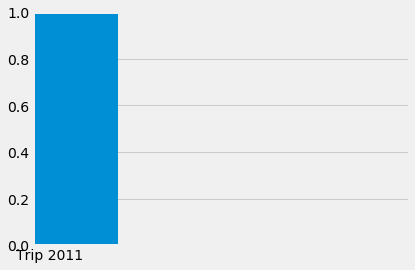

In [31]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)
plt.bar("Trip 2011", trip2011[0][1], width=0.4, yerr=(-8.755, 5.245))
plt.ylabel("Temperature (F)")
plt.show()


In [94]:
# Random Bonus Problem
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation
trip_range = ['2011-02-28', '2011-03-05']

trip_precipitation = session.query(Measurement.station, func.sum(Measurement.prcp), Station.latitude, Station.longitude, Station.elevation).\
                    filter(Measurement.date >= trip_range[0]).\
                    filter(Measurement.date <= trip_range[-1]).\
                    filter(Measurement.station == Station.station).\
                    group_by(Measurement.station).\
                    order_by(func.sum(Measurement.prcp).desc()).all()
trip_precipitation


[('USC00518838', 2.33),
 ('USC00519281', 2.23),
 ('USC00519523', 2.19),
 ('USC00514830', 1.96),
 ('USC00516128', 1.45),
 ('USC00513117', 1.44),
 ('USC00519397', 1.38),
 ('USC00511918', 0.63),
 ('USC00517948', None)]

In [96]:
trip_precipitation_df = pd.DataFrame(trip_precipitation, columns=["station", "precipitation (in)", "latitude", "longitude", "elevation"])
trip_precipitation_df


,station,precipitation (in)
0,USC00518838,2.33
1,USC00519281,2.23
2,USC00519523,2.19
3,USC00514830,1.96
4,USC00516128,1.45
5,USC00513117,1.44
6,USC00519397,1.38
7,USC00511918,0.63
8,USC00517948,NaN


In [42]:
#Bonus Analysis III
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [43]:
# calculate the daily normals for your trip
# push each tuple of calculations into a list called `normals`
trip_days = ["02-28", "03-01", "03-02", "03-03", "03-04", "03-05"]
normals = [daily_normals(date)[0] for date in trip_days]
normals


[(65.0, 70.65517241379311, 80.0),
 (64.0, 70.0327868852459, 76.0),
 (61.0, 70.36666666666666, 78.0),
 (60.0, 70.06896551724138, 78.0),
 (57.0, 69.27272727272727, 77.0),
 (60.0, 67.89090909090909, 76.0)]

In [57]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index
normals_df = pd.DataFrame(normals, columns=["tmin", "tavg", "tmax"],
                         index = trip_days)
normals_df


,tmin,tavg,tmax
02-28,65.0,70.655172,80.0
03-01,64.0,70.032787,76.0
03-02,61.0,70.366667,78.0
03-03,60.0,70.068966,78.0
03-04,57.0,69.272727,77.0
03-05,60.0,67.890909,76.0


Text(0, 0.5, 'Temperature (F)')

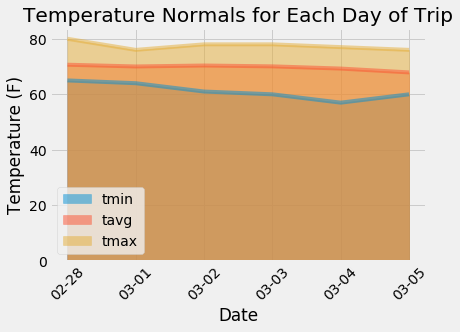

In [58]:
# Plot the daily normals as an area plot with `stacked=False`
area_plot = normals_df.plot.area(stacked=False, rot=45, title="Temperature Normals for Each Day of Trip")
area_plot.set_xlabel("Date")
area_plot.set_ylabel("Temperature (F)")
